# **MNIST 데이터셋으로 그럴싸한걸 해봅시다**

인공지능 계의
```
print("Hello, World!")
```
라고 불리는 MNIST 예제를 해결하는 것이 목표입니다.


> 0, 1, 2, .. 9 구별하기

[MNIST 데이터셋](http://yann.lecun.com/exdb/mnist/)을 로드하여 준비합니다. <br>
사실 다운받을 필요는 없고 Tensorflow에 내장되어 있습니다.

In [ ]:
#텐서플로우 불러오기
import tensorflow as tf

#텐서플로우 버전 확인하기
print(tf.__version__)

2.11.0


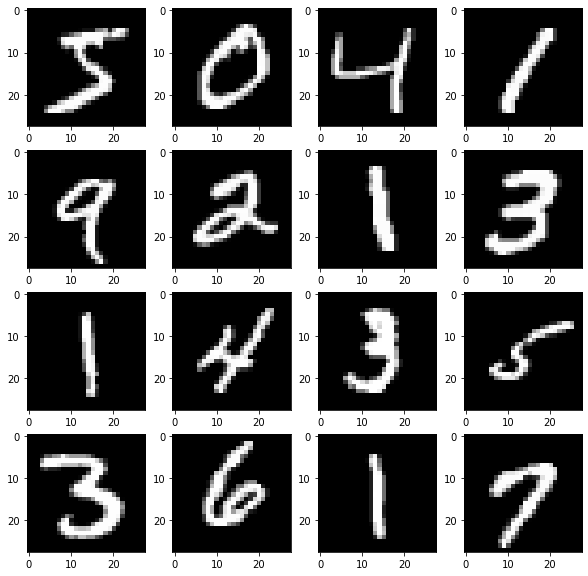

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7]


In [ ]:
#MNIST 데이터세트를 로드, 준비
mnist = tf.keras.datasets.mnist

#keras 레이어를 편하게 사용하기 위해 int에서 float으로 변환합니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

#데이터에 뭐가 있는지 구경합시다.
import matplotlib.pyplot as plt
# 전체 그래프의 크기를 width=10,height=10으로 지정합니다.
plt.figure(figsize=(10,10))
for c in range(16):
	# 4행 4열로 지정한 그리드에서 c+1번째의 칸에 그래프를 그립니다. 1~16번째 칸을 채우게 됩니다.
	plt.subplot(4,4,c+1)
	plt.imshow(x_train[c].reshape(28,28),cmap='gray')
plt.show()
# 훈련 데이터의 첫 번째~16번째 까지의 라벨을 프린트합니다.
print(y_train[:16])

## 머신 러닝 모델 빌드하기

층을 차례대로 쌓아 `tf.keras.Sequential` 모델을 만듭니다. <br> 훈련에 사용할 옵티마이저(optimizer)와 활성화 함수, 손실 함수를 선택합니다.
<br>
**인공지능을 다룰때 가장 중요한 것은 시행착오와 결과입니다. 부디 여러가지 함수를 하나씩 사용해보면서 결과를 비교해보기를 바랍니다.**

<br>


> 옵티마이저

 손실 함수를 줄여나가면서 학습하는 방법 <br>
 예전에 배운 GD(경사하강법)도 옵티마이저의 일종이다. <br>
 [더 자세한 정보는 여기서 알 수 있습니다.](https://keras.io/ko/optimizers/#keras) <font size="2em" color="gray"> <br>
 옵티마이저 설명 글을 이해하지 못해도 괜찮습니다. 차근차근! <br> </font>

1. SGD (확률적 경사하강법)<br>
```
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
```
<font size="2em" color="gray">
입력 데이터 중 일부만으로 가중치와 편향이 업데이트되는 방법으로, 학습 속도를 빠르게 할 수 있다. </font> <br><br>

2. RMSprop <br>
```
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
```
<font size="2em" color="gray">
RNN(순환 신경망)의 옵티마이저로 많이 사용된다. <br>
주의. lr(학습률)을 제외한 값들은 기본값을 권장합니다. </font> <br><br>

3. Adagrad <br>
```
keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
```
<font size="2em" color="gray">
모델 파라미터별 학습률을 사용하는 옵티마이저이다. 즉, 파라미터의 값이 업데이트되는 빈도에 의해 학습률이 결정된다. <br>
주의. 모든 값들에 대해 기본값을 권장합니다.  </font> <br><br>

4. Adadelta<br>
```
keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
```
<font size="2em" color="gray">
Adagrad의 확장판으로, 그래디언트 업데이트의 이동창에 기반하여 학습률을 조절한다. <br>
주의. 모든 값들에 대해 기본값을 권장합니다.  </font> <br><br>

5. Adam<br>
```
keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
```
<font size="2em" color="gray">
가장 많이 쓸 옵티마이저 중 하나로, RMSporp과 Momentum(SGD에서 가던 방향으로 계속 가려는 성질을 추가한 알고리즘)을 짬뽕한 옵티마이저이다. </font> <br><br>

6. Adamax<br>
```
keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
```
<font size="2em" color="gray">
infinity norm에 기반한 Adam의 변형이다. </font> <br><br>

7. Nadam<br>
```
keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)
```
<font size="2em" color="gray">
 RMSprop과 NAG를 짬뽕한 알고리즘. </font> <br><br>


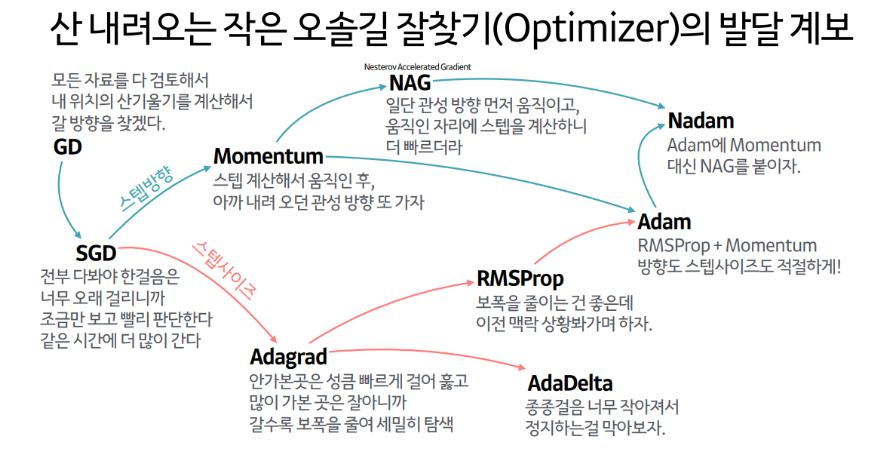

<font size="2em" color="gray"> 이렇게 완벽한 사진을 본 적이 없습니다 </font><br>



> 활성화 함수

신경망에서의 다음 layer로 신호를 얼마나 전달할 지 결정하는 함수 <br>
[더욱 많은 함수와 자세한 정보는 여기서](https://keras.io/ko/activations/)
<br>
1. relu<br>
<font size="2em" color="gray">
layer가 늘어날 때 값이 사라지는 현상을 해결하기 위한 함수. 가장 많이 사용된다. 다만 활성화 값이 0이면 출력 값이 0이 된다는 한계가 있다. </font> <br><br>

2. elu<br>
<font size="2em" color="gray">
ReLU와 비슷하나 지수함수를 이용해 입력이 0 이하면 부드럽게 깎아내려옴. 다만 지수함수라 계산 시간이 길다. </font> <br><br>

3. sigmoid<br>
<font size="2em" color="gray">
이진 분류를 위해 사용하는, 0과 1 사이 값만을 가지는 함수. 기울기 소실 문제가 있다. </font> <br><br>

4. softmax<br>
<font size="2em" color="gray">
모든 레이블에 대한 출력값을 더하면 1이 됨. 다중 분류의 출력층 활성화함수! </font> <br><br>

5. tanh<br>
<font size="2em" color="gray">
sigmoid 함수의 변형판. -1과 1 사이 값을 가진다. 기울기 소실 문제가 있다. </font> <br><br>

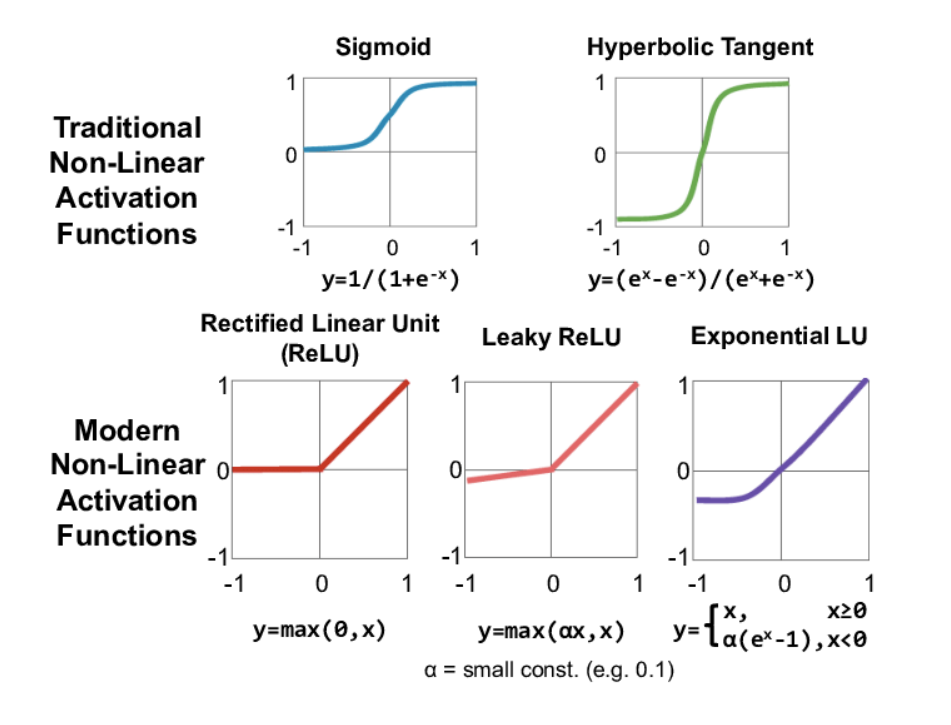



> 그래서 기울기 소실이 뭔데

sigmoid 함수 이용시 도함수가 0.25가 최대이고, 신경망을 많이 쌓으면 쌓을수록 이 도함수가 중첩되어 학습량이 0에 수렴하여 가중치가 업데이트되지 않는 현상. 아래 식이 중첩된다고 생각해보세요!

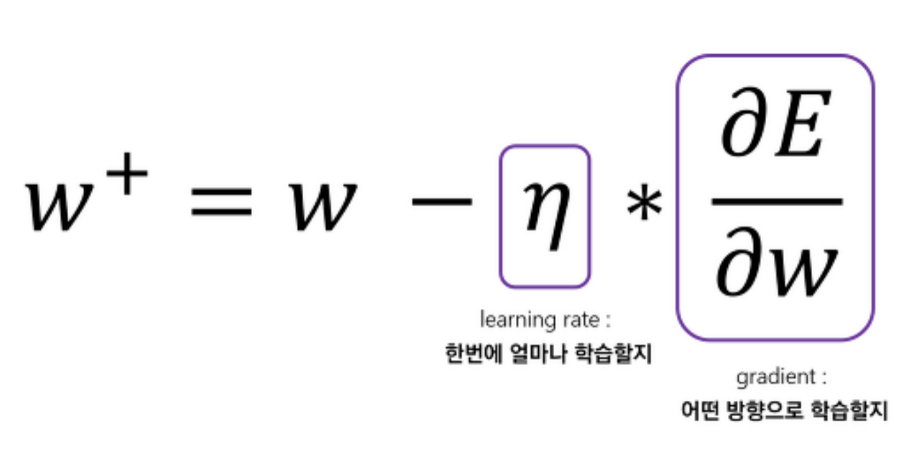

> 손실함수

* 평균 제곱 계열, 회귀문제 전용
  + mse : 오차의 제곱의 합의 평균
  + rmse : 오차 제곱의 합의 제곱근의 편균
  + mae : 오차의 절댓값의 합의 평균
  + r-squared(설명계수) : 설명할 수 있는 변동/총 변동
  + mean_absolute_percentagerror : ((y_test - y_pred) / y_test)의 절댓값의 평균
  + mean_squared_logarithmicerror : mse 식에 로그적용

* 엔트로피 계열, 분류 문제
  + binarycrossentropy : 이진분류
  + categoricalcrossentropy : 다중분류 (one-hot encoding 클래스)
  + sparse_categorical_crossentropy : 다중분류 (integer type 클래스)

<br>

> 학습 규제 전략

과적합을 막기 위해 하는 특수 조치들. <br>
규제 목적은 같으니 여기 나오는 함수를 여러개 쓸 필요는 없겠죠?? <br>
[더 많은 함수와 내용은 여기서](https://keras.io/ko/callbacks/)

* 과적합 : 모델이 테스트 데이터에는 성능이 좋은데 실전에서는 그렇지 않은 경우

1. EarlyStopping<br>
```
keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
```
<font size="2em" color="gray">
관찰되는 수량이 개선되지 않으면 학습을 멈춥니다. </font> <br><br>


2. Weight Decay(가중치 감소)<br>
```
    Dense(64, input_dim=64,
            # 이곳에 패널티를 부과하는 코드를 기재하면 됩니다. 
            kernel_regularizer=regularizers.l2(0.01),    # L2 norm regularization
            activity_regularizer=regularizers.l1(0.01)), # L1 norm regularization
            )
```
<font size="2em" color="gray">
복잡도가 높은 문제에서 단순한 데이터로 과적합이 발생하는 상황에서 사용합니다.<br>
L1 규제는 이상치에 영향을 받지 않게 하기 위해서, L2는 이상치에 영향을 더 받게 하기 위해서 사용합니다. </font> <br><br>


3. Dropout<br>
```
keras.layers.Dropout(0.2)
```
<font size="2em" color="gray">
가장 많이 사용할 전략으로, 일부 노드를 누락시킨채로 학습을 진행합니다. </font> <br><br>


In [ ]:
#머신 러닝 모델 빌드하기
#relu, softmax 활성화함수 / adam 옵티마이저 / sparse_categorical_crossentropy 손실함수
#dropout 학습 전략 사용

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#여러가지 함수들과 옵티마이저를 적용한다던지, 
#레이어를 더 쌓아본다던지 여러가지 방법을 시도해봅시다.

Epoch 1/10
2100/2100 [==============================] - 15s 6ms/step - loss: 0.3142 - accuracy: 0.9084 - val_loss: 0.1741 - val_accuracy: 0.9503
Epoch 2/10
2100/2100 [==============================] - 13s 6ms/step - loss: 0.1609 - accuracy: 0.9521 - val_loss: 0.1396 - val_accuracy: 0.9594
Epoch 3/10
2100/2100 [==============================] - 14s 6ms/step - loss: 0.1199 - accuracy: 0.9633 - val_loss: 0.1187 - val_accuracy: 0.9649
Epoch 4/10
2100/2100 [==============================] - 17s 8ms/step - loss: 0.0948 - accuracy: 0.9710 - val_loss: 0.1170 - val_accuracy: 0.9663
Epoch 5/10
2100/2100 [==============================] - 16s 7ms/step - loss: 0.0811 - accuracy: 0.9747 - val_loss: 0.1032 - val_accuracy: 0.9713
Epoch 6/10
2100/2100 [==============================] - 13s 6ms/step - loss: 0.0681 - accuracy: 0.9784 - val_loss: 0.1065 - val_accuracy: 0.9703
Epoch 7/10
2100/2100 [==============================] - 14s 7ms/step - loss: 0.0615 - accuracy: 0.9804 - val_loss: 0.1016 - val_ac

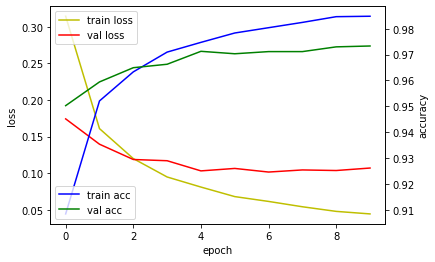

In [ ]:
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

# fit()함수의 인자로는 학습에 필요한 데이터셋, 검증에 필요한 데이터셋, 그리고 에포크값을 사용한다.
# 에포크란 학습 횟수를 의미하며 적당한 값을 찾아 대입해야 한다.

# 모델 평가
print('모델 평가')
model.evaluate( x_test, y_test )

# 모델 정보 출력
model.summary()

# 모델 저장
model.save('mnist_model.h5')

# 학습이 완료된 모델을 h5파일 포맷으로 저장한다.

# 학습 결과 그래프 그리기

import matplotlib.pyplot as plt
# matplotlib 사용법은 차차 알아가도록 합시다.
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step - loss: 0.0884 - accuracy: 0.9739


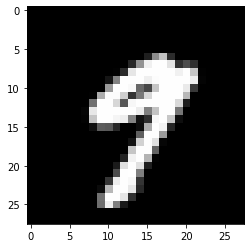

예측값 : [9]


In [ ]:
import numpy as np

# 모델 불러오기
model = tf.keras.models.load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test)
# 케라스의 load_model()함수를 이용해 모델 파일을 불러온다.

# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()
# matplotlib.pyplot의 imshow()함수를 이용해 테스트셋의 20번째 숫자 이미지를 흑백으로 출력

# 테스트셋의 20번째 이미지 클래스 분류
picks = [20]
y_prob = model.predict(x_test[picks], verbose=0) 
predict = y_prob.argmax(axis=-1)

print("예측값 :", predict)

[추가 예제 : 직접 손글씨를 모델에 적용시켜 보기](https://jjeongil.tistory.com/820)